In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import asPolygon


In [2]:
def turn_time_to_cor(resolution, hour,minute):
    return resolution * hour + int(minute * resolution/60)
def judge_point(poly, px,py):
    return poly.contains(Point(px,py))

/opt/software/anaconda/envs/rlABM/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPolygon()' or 'PolygonAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Polygon()' constructor instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


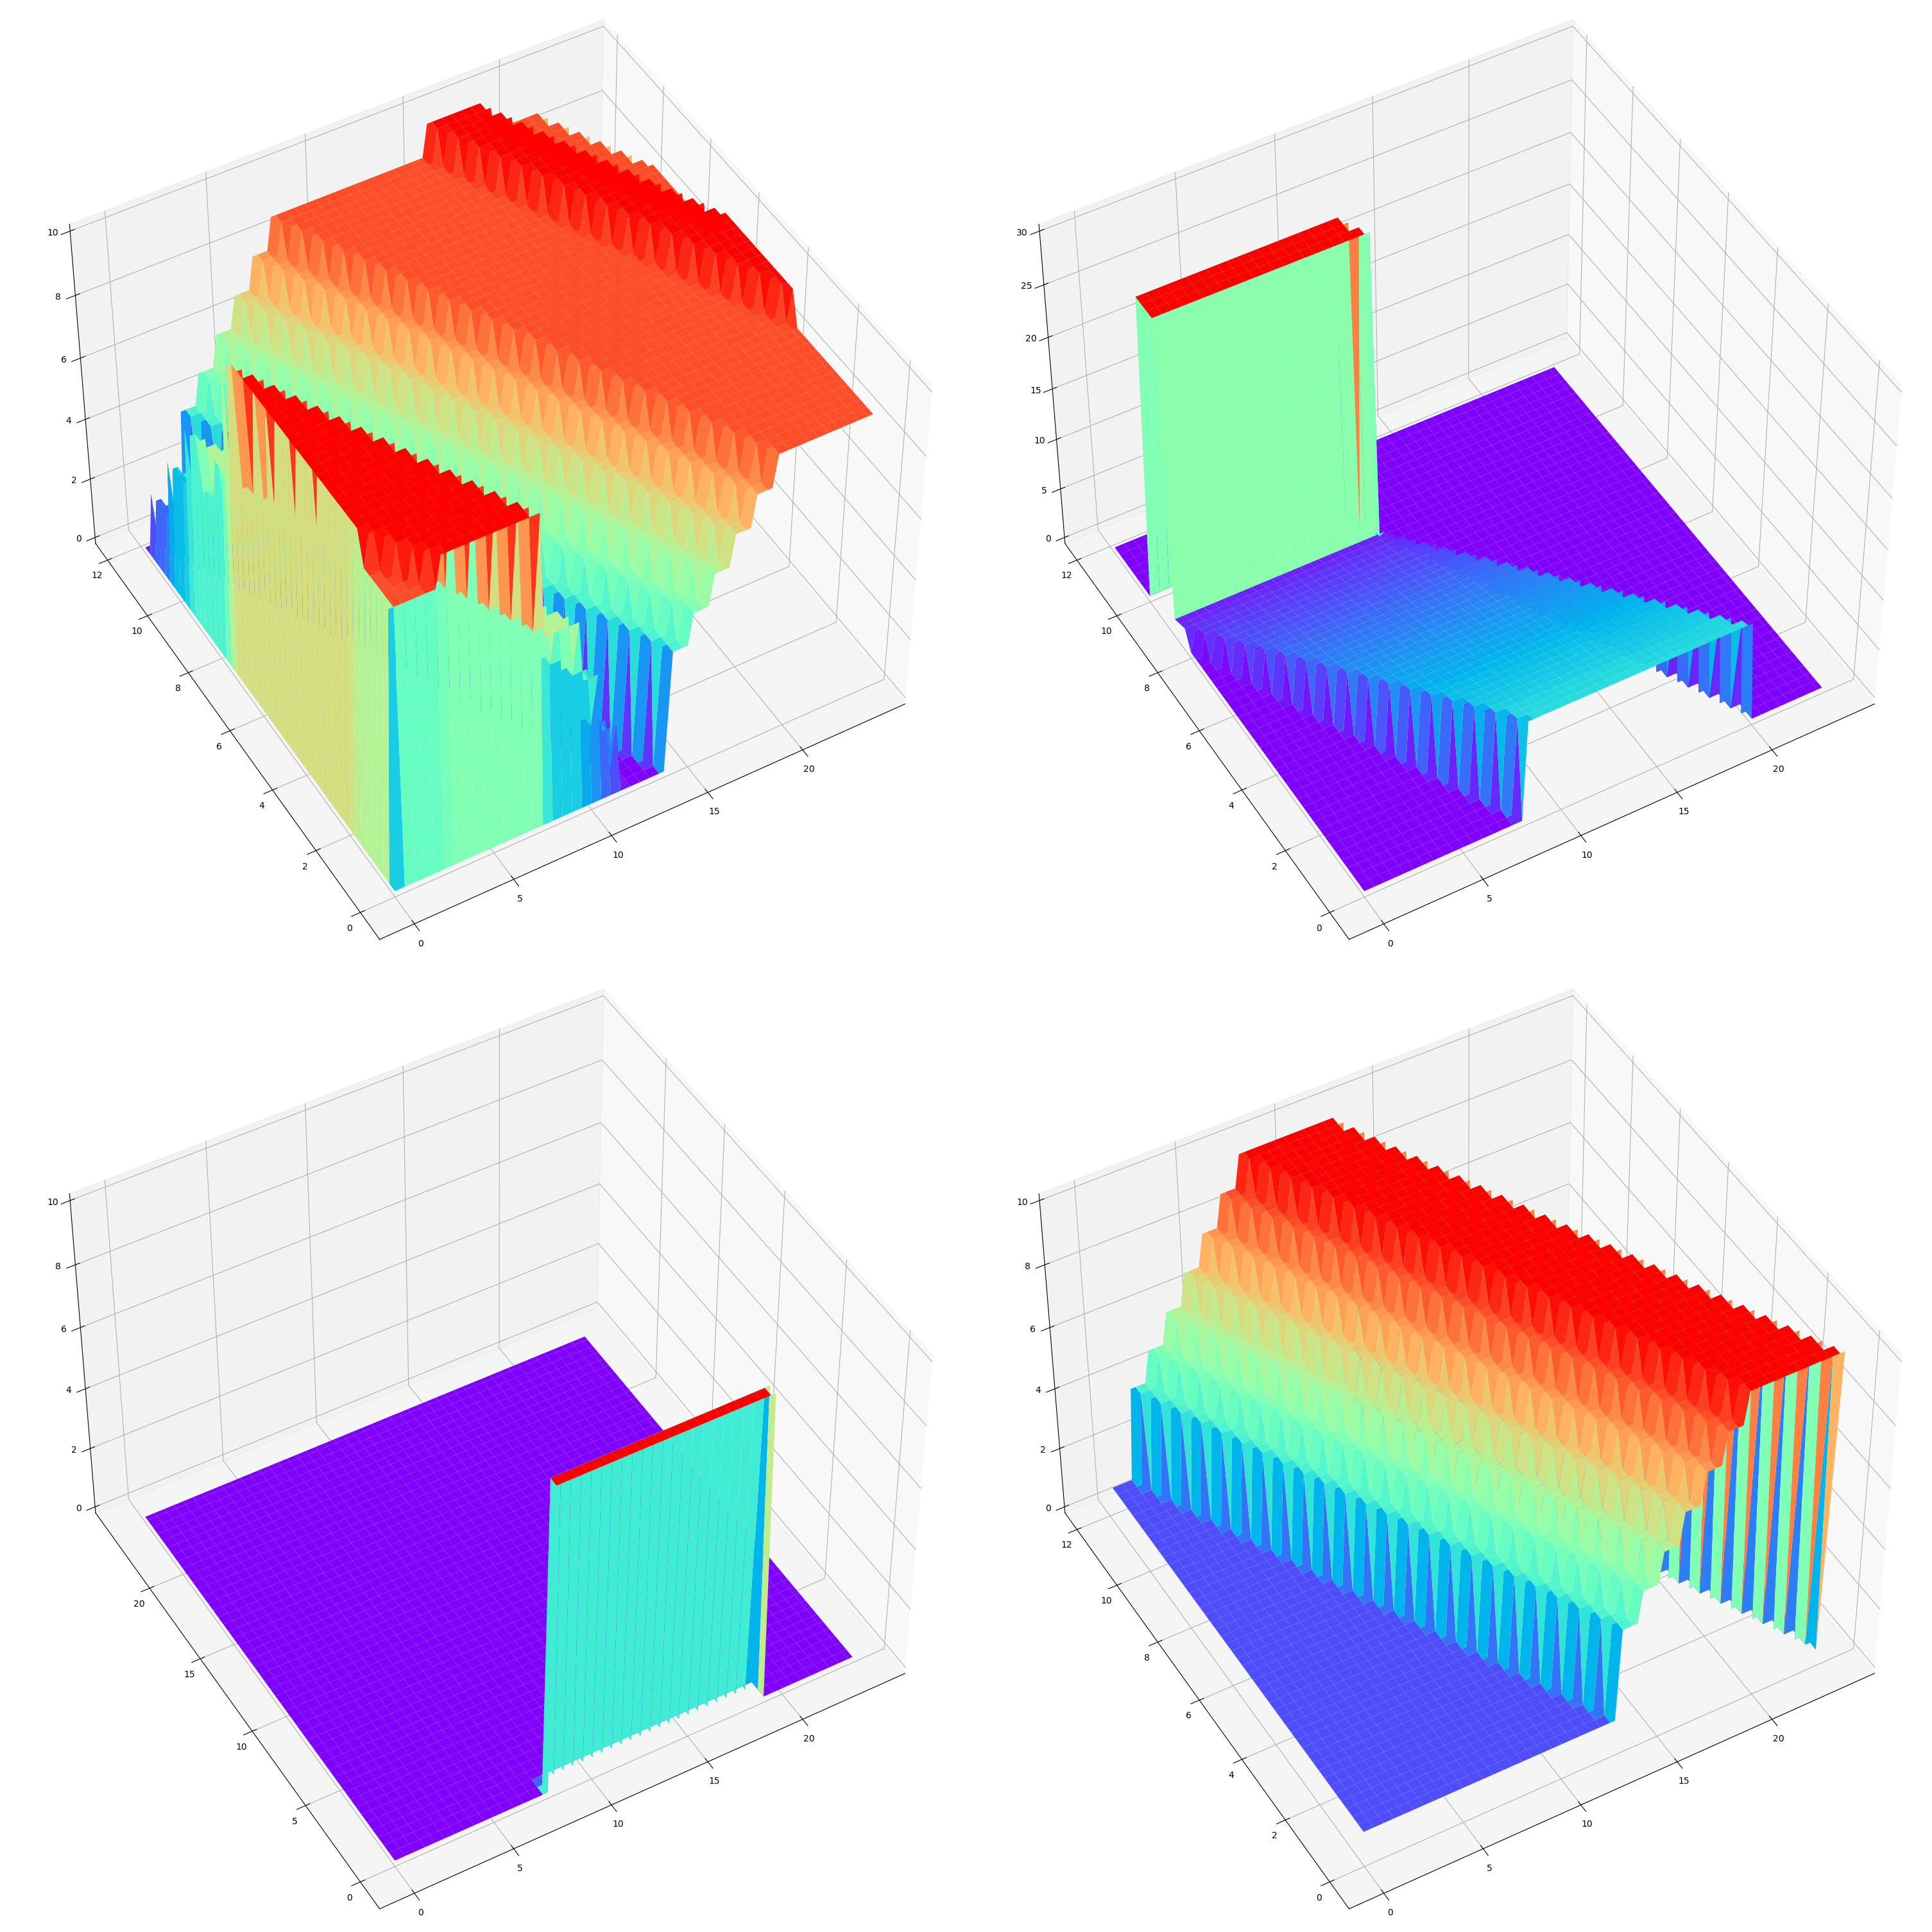

In [3]:


fig = plt.figure(constrained_layout=True, figsize=(30,30),num=1,clear=True)
# gs = GridSpec(10, 10)
# ax1 = fig.add_subplot(gs[:, 0:9])
# ax2 = fig.add_subplot(gs[0:4, 7:])
ax3 =  fig.add_subplot(223, projection='3d')
ax4 =  fig.add_subplot(221, projection='3d')
ax5 =  fig.add_subplot(224, projection='3d')
ax6 =  fig.add_subplot(222, projection='3d')


#定义三维数据
xx = np.arange(0,24,0.25)
yy = np.arange(0,24,0.25)
X, Y = np.meshgrid(xx, yy)
#作图
Z = np.zeros((len(xx),len(yy)))
Z[0:turn_time_to_cor(4,0,45),turn_time_to_cor(4,8,0) : turn_time_to_cor(4,19,0)]  =  10
ax3.plot_surface(X,Y,Z,cmap='rainbow')
ax3.view_init(elev=46, azim=-120)
Z_shopping = Z
######################################

#定义三维数据
xx = np.arange(0,24,0.25)
yy = np.arange(0,12,0.25)
X, Y = np.meshgrid(xx, yy)
#作图
Z = np.zeros((len(yy),len(xx)))
# Z[0:turn_time_to_cor(4,8,0),0 : turn_time_to_cor(4,8,0)]  =  10

for i in (12,11,10,8):
    poly2 = asPolygon([(0, turn_time_to_cor(4,i,0)),( turn_time_to_cor(4,i,0),0), (0,0)])
    for x in range(len(Z)):
        for y in range(len(Z)):
            if judge_point(poly2,x,y):
                Z[x,y] = 18-i - (i - 8)
#
#
poly2 = asPolygon([(0, turn_time_to_cor(4,3,0)),( turn_time_to_cor(4,2,0),0), (0,0)])
for x in range(len(Z)):
    for y in range(len(Z)):
        if judge_point(poly2,x,y):
            Z[x,y] = 9
max24 = turn_time_to_cor(4,24,0)
max12 = turn_time_to_cor(4,12,0)



for k in range(14,20):
    for i in range(0, 48):
        for j in range(0, 96):
            if i + j >= k * 4:
                Z[i, j] = k - 14 + 4

for i in range(0, 48):
    for j in range(0, 96):
        if i + j >= 80:
            Z[i, j] = 9

for i in range(0, 48):
    for j in range(0, 96):
        if i + j >= 108:
            Z[i, j] = 10

for i in range(0, 48):
    for j in range(0, 96):
        if i + j >= 120:
            Z[i, j] = 9

for i in range(0, 48):
    for j in range(0, 96):
        if i + j >= 132:
            Z[i, j] = 0

Z_home = Z

ax4.plot_surface(X,Y,Z,cmap='rainbow')
ax4.view_init(elev=46, azim=-120)
Z_shopping = Z
#定义三维数据
xx = np.arange(0,24,0.25)
yy = np.arange(0,12,0.25)
X, Y = np.meshgrid(xx, yy)
#作图
Z = np.zeros((len(yy),len(xx)))
for i in range(0, 48):
    for j in range(0, 96):
        Z[i, j] = 1



for k in range(13,19):
    for i in range(0, 48):
        for j in range(0, 96):
            if i + j >= k * 4:
                Z[i, j] = k - 9

for i in range(0, 48):
    for j in range(0, 96):
        if i + j >= 19*4:
            Z[i, j] = 10

for i in range(0, 48):
    for j in range(0, 96):
        if i + j >= 24*4:
            Z[i, j] = 0
ax5.plot_surface(X,Y,Z,cmap='rainbow')
ax5.view_init(elev=46, azim=-120)

Z_leisure = Z

#定义三维数据
xx = np.arange(0,24,0.25)
yy = np.arange(0,12,0.25)
X, Y = np.meshgrid(xx, yy)
#作图
Z = np.zeros((len(yy),len(xx)))

for i in range(0,40):
    for j in range(0, 96):
        Z[i, j] = 10 - 10* i/40

for i in range(36,40):
    for j in range(0,96):
        Z[i, j] = 30

for i in range(0, 48):
    for j in range(0, 96):
        if i + j <= 8*4 or  i + j >= 80:
            Z[i, j] = 0


ax6.plot_surface(X,Y,Z,cmap='rainbow')
ax6.view_init(elev=46, azim=-120)
Z_work = Z

plt.show()


In [4]:
travel_time= [45,15,15,30]

In [ ]:

# 构建state矩阵
# 4 activity , 2 action state_space(activity,start_time,dur)
state = np.zeros(1,3)
action = [0,1]


In [ ]:
class Env:
    def __init__(self):
        self.reward_leisure = Z_leisure
        self.reward_home = Z_home
        self.reward_shop = Z_shopping
        self.reward_work = Z_work
        self.cur_activity = 0

    def step(self,state,action) :
        next_state = np.zeros(1,3)
        # order is h,w,s,l
        if action == 1:
            # next activity
            if state[0] != 3:
                state[0] += 1

        else:
            cur_act = {
                0:Z_home,
                1:Z_work,
                2:Z_shopping,
                3:Z_leisure
            }
            re_table = cur_act.get(state[0])

            #if exceed , automatic change to next act
            if state[2] == 12 * 4 - 1:
                next_state[0] += 1
            reward = re_table[state[1],state[2] + 1]


